In [6]:
# actualizamos los modulos
%reload_ext autoreload
%autoreload 2

# imports
import df_info
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import json_normalize
import json

# ruta
ruta_user_items = 'dataset/user_items.parquet'

# df
user_items_df = pd.read_parquet(ruta_user_items)

In [7]:
user_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88310 entries, 0 to 88309
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      88310 non-null  object
 1   items_count  88310 non-null  int64 
 2   steam_id     88310 non-null  object
 3   user_url     88310 non-null  object
 4   items        88310 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.4+ MB


In [8]:
user_items_df.shape

(88310, 5)

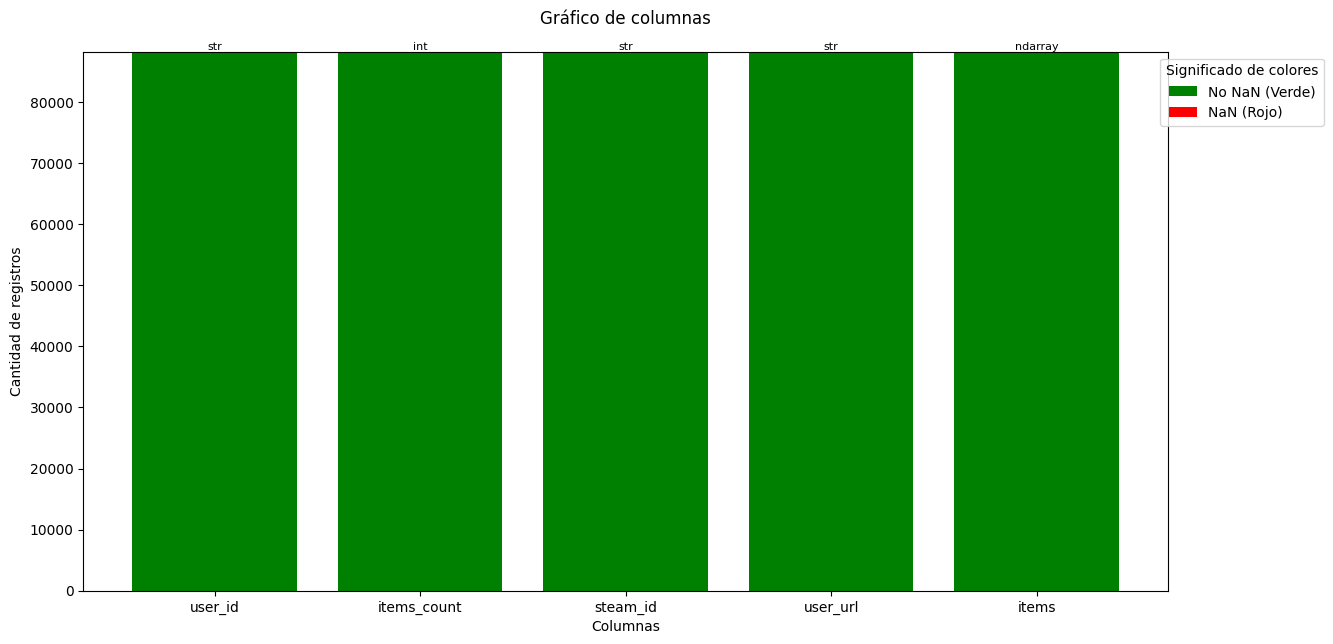

In [9]:
df_info.plot_df_info(user_items_df)

In [10]:
# Pasamos la columna items a tipo de dato lista para poder manipularla luego en la desanidación:
user_items_df['items'] = user_items_df['items'].apply(lambda x: x.tolist())

In [11]:
'''
Observamos un campo o columna que tiene datos anidados, que con un explode podríamos generar una tabla nueva con esa infromación,
pero antes vamos a explorar la posibilidad, y siendo que no existen datos nulos, que haya datos duplicados, si bien no podremos
hacer nada con ello hasta despues del explode, debido a que analizar registro por registro nos haria tener que iterar la columna,
accion que con el explode igualmente deberiamos hacer, solo que va a ser mucho mas comodo iterar sobre columnas, que sobre una 
columna con arrays, y dentro de los arrays.
'''

'\nObservamos un campo o columna que tiene datos anidados, que con un explode podríamos generar una tabla nueva con esa infromación,\npero antes vamos a explorar la posibilidad, y siendo que no existen datos nulos, que haya datos duplicados, si bien no podremos\nhacer nada con ello hasta despues del explode, debido a que analizar registro por registro nos haria tener que iterar la columna,\naccion que con el explode igualmente deberiamos hacer, solo que va a ser mucho mas comodo iterar sobre columnas, que sobre una \ncolumna con arrays, y dentro de los arrays.\n'

In [12]:
duplicados_agrupados = user_items_df.sort_values(by='user_id')\
                                     .loc[user_items_df.duplicated(subset=['user_id'], keep=False)]
duplicados_agrupados

,user_id,items_count,steam_id,user_url,items
29193,05041129,35,76561198167088451,http://steamcommunity.com/id/05041129,"[{'item_id': '4000', 'item_name': 'Garry's Mod..."
11000,05041129,35,76561198167088451,http://steamcommunity.com/id/05041129,"[{'item_id': '4000', 'item_name': 'Garry's Mod..."
37062,10outof10matee,56,76561198050688208,http://steamcommunity.com/id/10outof10matee,"[{'item_id': '220', 'item_name': 'Half-Life 2'..."
37061,10outof10matee,56,76561198050688208,http://steamcommunity.com/id/10outof10matee,"[{'item_id': '220', 'item_name': 'Half-Life 2'..."
6163,111222333444555666888,52,76561198082607692,http://steamcommunity.com/id/11122233344455566...,"[{'item_id': '240', 'item_name': 'Counter-Stri..."
...,...,...,...,...,...
16405,youseeitnowgetout,5,76561198087136132,http://steamcommunity.com/id/youseeitnowgetout,"[{'item_id': '230410', 'item_name': 'Warframe'..."
3473,zandado,107,76561198057890701,http://steamcommunity.com/id/zandado,"[{'item_id': '20', 'item_name': 'Team Fortress..."
34176,zandado,107,76561198057890701,http://steamcommunity.com/id/zandado,"[{'item_id': '20', 'item_name': 'Team Fortress..."
12417,zeroblade,306,76561197970272666,http://steamcommunity.com/id/zeroblade,"[{'item_id': '18110', 'item_name': 'Shattered ..."


Existen duplicados

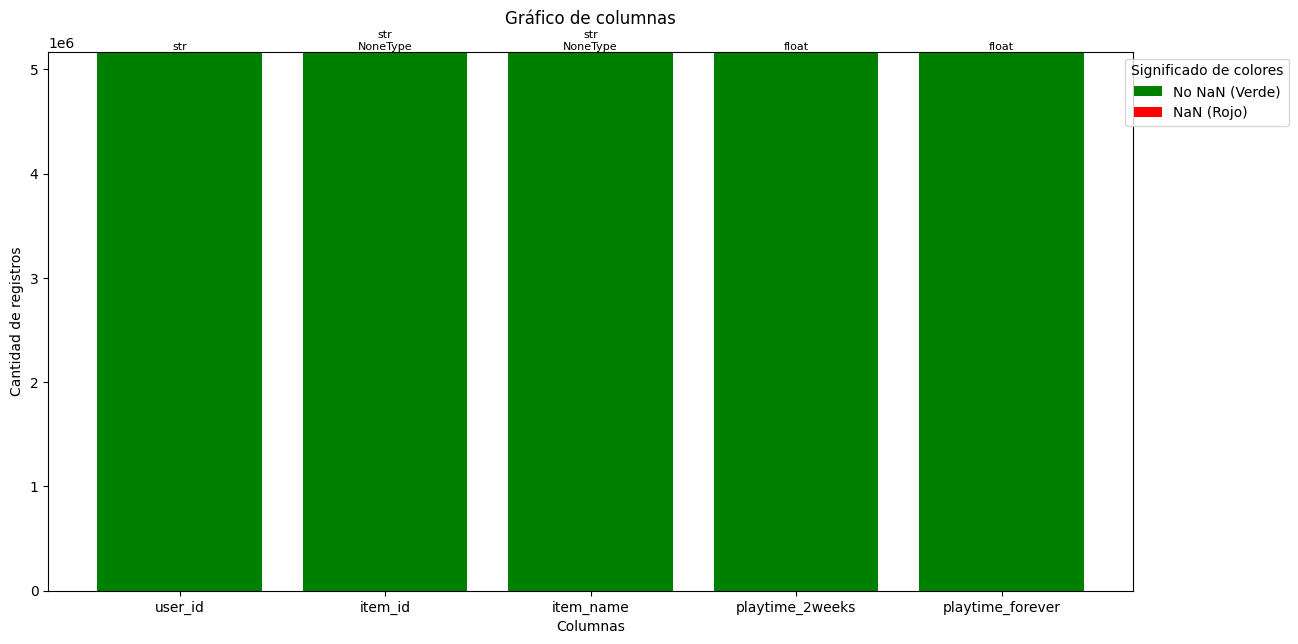

In [15]:
# Inicializar una lista para almacenar los registros expandidos
expanded_data = []

# Iterar sobre cada fila del DataFrame
for index, row in user_items_df.iterrows():
    user_id = row['user_id']
    items_list = row['items']
    
    # Verificar si la lista de items está vacía
    if items_list:
        # Iterar sobre cada diccionario en la lista de items
        for item_dict in items_list:
            # Crear un nuevo registro con el mismo user_id y los valores del diccionario
            new_record = {'user_id': user_id}
            new_record.update(item_dict)  # Agregar valores del diccionario al nuevo registro
            expanded_data.append(new_record)
    else:
        # Si la lista de items está vacía, crear un registro con el user_id y valores nulos
        new_record = {'user_id': user_id, 'item_id': None, 'item_name': None, 'playtime_2weeks': None, 'playtime_forever': None}
        expanded_data.append(new_record)

# Crear un nuevo DataFrame a partir de los registros expandidos
exploded_df = pd.DataFrame(expanded_data)

df_info.plot_df_info(exploded_df)

In [21]:
# Configurar opciones de visualización para mostrar todas las filas y columnas
exploded_df.head(100)

,user_id,item_id,item_name,playtime_2weeks,playtime_forever
0,76561197970982479,10,Counter-Strike,0.0,6.0
1,76561197970982479,20,Team Fortress Classic,0.0,0.0
2,76561197970982479,30,Day of Defeat,0.0,7.0
3,76561197970982479,40,Deathmatch Classic,0.0,0.0
4,76561197970982479,50,Half-Life: Opposing Force,0.0,0.0
5,76561197970982479,60,Ricochet,0.0,0.0
6,76561197970982479,70,Half-Life,0.0,0.0
7,76561197970982479,130,Half-Life: Blue Shift,0.0,0.0
8,76561197970982479,300,Day of Defeat: Source,0.0,4733.0
9,76561197970982479,240,Counter-Strike: Source,0.0,1853.0
